<a href="https://colab.research.google.com/github/kouliki/oibsip_3/blob/main/TASK_2_Car_Price_Prediction_Oasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1- Install kaggle
!pip install kaggle

In [ ]:
#Upload you API token kaggle.json:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"koulikimahato","key":"a35738acb7889b4e27cc8d7e82f549f3"}'}

In [ ]:
#Create a directory kaggle , move the kaggle.json to kaggle directory , change permissions to the file :
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle datasets download -d vijayaadithyanvg/car-price-predictionused-cars

Dataset URL: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars
License(s): CC0-1.0
  0% 0.00/3.76k [00:00<?, ?B/s]
100% 3.76k/3.76k [00:00<00:00, 3.48MB/s]


In [ ]:
! unzip car-price-predictionused-cars.zip

Archive:  car-price-predictionused-cars.zip
  inflating: car data.csv            


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/car data.csv")

In [ ]:
df=pd.read_csv("car data.csv")

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Handling missing values

In [ ]:
print("the null values are :")
print("\n")
print(df.isnull().sum())
print("\n")

df = df.dropna()
print("After removing the null values the new count is :")
print("\n")
print(df.isnull().sum())
print("\n")

print("the duplicated values count:")
print(df.duplicated().sum())
print("\n")

print("Renaming the columns after removing the starting space")
print("\n")
df.columns=df.columns.str.strip()
df.head()

the null values are :


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


After removing the null values the new count is :


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


the duplicated values count:
2


Renaming the columns after removing the starting space




,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.drop_duplicates(inplace=True)
print("the duplicated values count:")
print(df.duplicated().sum())
print("\n")

the duplicated values count:
0




In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()


Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [ ]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [ ]:
df['Transmission'].value_counts()


Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [ ]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

# Data Visualization

## graph on the basis of owner of the cars

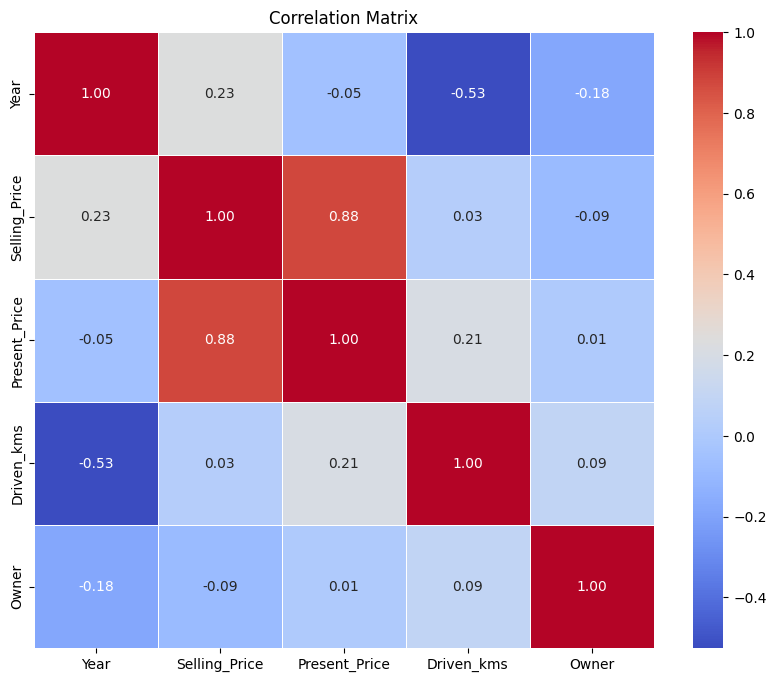

In [ ]:
# Select numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


selling price is highly correlated with the present price i.e higher the SP higher is the Present Price.

Year is negatively correlated with the Present price, driven_kms,and owners i.e as the life span of the cars increases the present price, driven_kms,and owners their value decreases with time.

driven-kms is very weakly correlated with the selling price,present price and transmission.

```
# This is formatted as code
```




<ipython-input-21-f51ab02472ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-21-f51ab02472ff>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


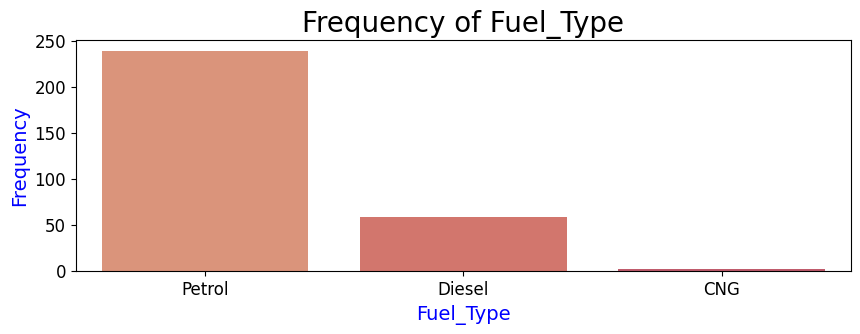

<ipython-input-21-f51ab02472ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-21-f51ab02472ff>:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


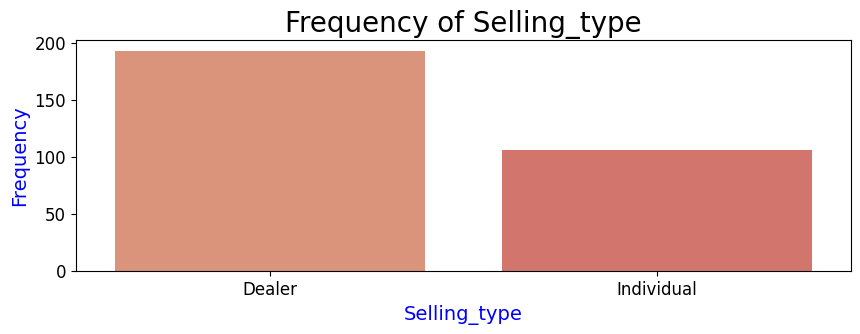

<ipython-input-21-f51ab02472ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-21-f51ab02472ff>:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


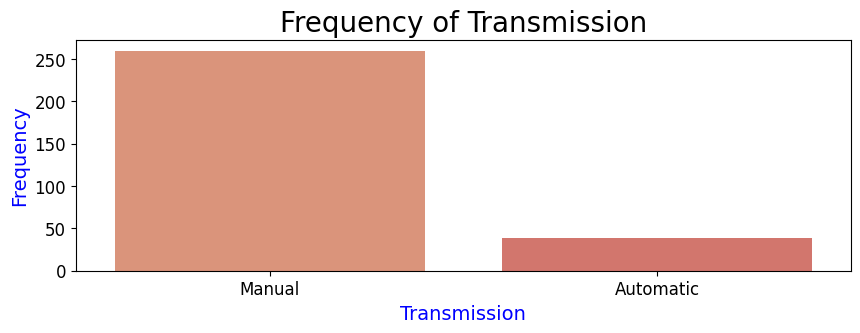

<ipython-input-21-f51ab02472ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette=colors)
<ipython-input-21-f51ab02472ff>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x=feature, data=df, palette=colors)


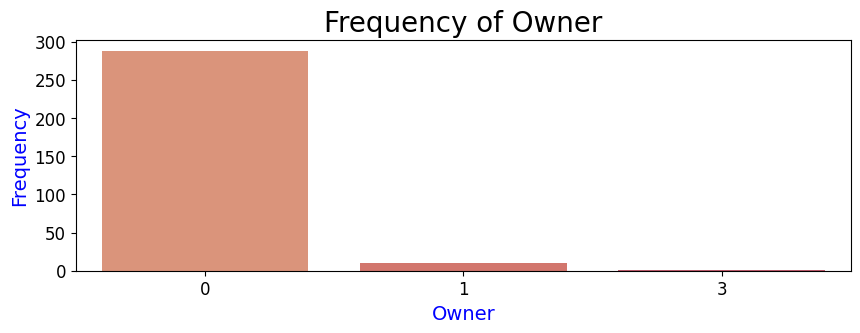

In [ ]:
colors = sns.color_palette("flare")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
# Plot each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 3))
    sns.countplot(x=feature, data=df, palette=colors)
    plt.title(f'Frequency of {feature}', fontsize=20)
    plt.xlabel(f'{feature}', fontsize=14, color='Blue')
    plt.ylabel('Frequency', fontsize=14, color='Blue')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [ ]:
import plotly.graph_objs as go

# Group the data by Car_Model and calculate the mean transmission for each car model
top_20_car_model_by_sp = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Select the top 20 cars
top_20_cars = top_20_car_model_by_sp.head(20)

# Create Plotly figure
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(x=top_20_cars.index,
                     y=top_20_cars.values,
                     marker_color='green',
                     name='Mean Transmission'))

# Customize layout
fig.update_layout(title='Top 20 Cars by Mean Transmission',
                  xaxis_title='Car Name',
                  yaxis_title='Mean Transmission',
                  template='plotly',
                  width=1000,
                  height=600)

# Show interactive plot
fig.show()



In [ ]:
import plotly.graph_objs as go

car_model_frequency = df['Car_Name'].value_counts().reset_index()
car_model_frequency.columns = ['Car_Name', 'Frequency']

# Select the top 20 car models
top_20_car_models = car_model_frequency.head(20)

# Create Plotly figure
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(x=top_20_car_models['Car_Name'],
                     y=top_20_car_models['Frequency'],
                     marker_color='green',
                     name='Frequency'))

# Customize layout
fig.update_layout(title='Top 20 Car Models by Frequency',
                  xaxis_title='Car Name',
                  yaxis_title='Frequency',
                  template='plotly',
                  width=1000,
                  height=600)

# Show interactive plot
fig.show()




#Distribution of the Numerical columns

In [ ]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']

for feature in numerical_features:
    # Create histogram trace
    hist_trace = go.Histogram(x=df[feature], marker_color='lightyellow', marker_line_color='Red', marker_line_width=1)

    # Create layout
    layout = go.Layout(title=f'<b>Distribution of {feature}</b>',
                       xaxis=dict(title=feature),
                       yaxis=dict(title='Count'),
                       width=1000,height=600)

    # Create figure
    fig = go.Figure(data=[hist_trace], layout=layout)

    # Show interactive plot
    fig.show()

## Diesel is more as compared to distance.

In [ ]:
df['Transmission'].replace({'Automatic': 0, 'Manual': 1}, inplace=True)
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# Training and Testing of models
```



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features]=scaler.fit_transform(df[numerical_features])

In [ ]:
x=df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction=lr.predict(x_test)

In [ ]:
y_prediction[0:5]

array([ 0.59296091,  0.60658618, -0.6488809 ,  0.45188417,  1.34140604])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_sq_error_linear = mean_squared_error(y_test,y_prediction)
r2_linear = r2_score(y_test,y_prediction)
print("Mean Squared Error (MSE) for Linear Regression:", mean_sq_error_linear)
print("==============================================================================")
print("R-squared (R2) Score for Linear Regression:", r2_linear)

Mean Squared Error (MSE) for Linear Regression: 0.26961077915851267
R-squared (R2) Score for Linear Regression: 0.7409934356413544
